In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"
salt_type = 'None'

,index,building id,total cost - no TES,total cost - w TES,cost saving,cost saving %
0,287,288,2524.802218,2478.472389,46.329829,0.018350
1,399,400,2312.417210,2267.755606,44.661605,0.019314
2,4,5,2343.104016,2297.540694,45.563322,0.019446
3,385,386,2264.312348,2219.729108,44.583240,0.019690
4,0,1,2304.413815,2258.846843,45.566973,0.019774
...,...,...,...,...,...,...
395,364,365,276.717077,240.046961,36.670116,0.132518
396,338,339,230.379221,195.437533,34.941688,0.151670
397,210,211,209.135256,175.641130,33.494126,0.160155
398,233,234,198.406386,165.003235,33.403152,0.168357


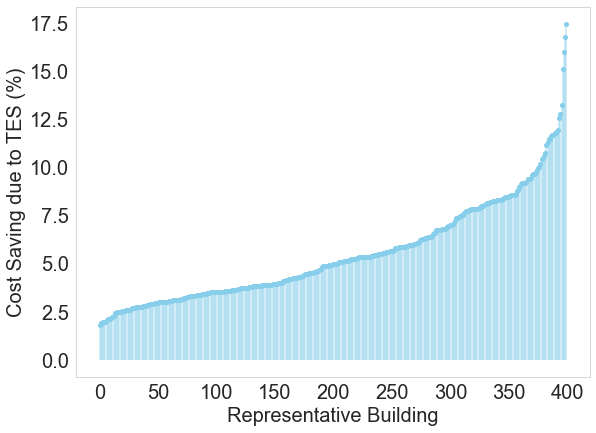

In [21]:
# Total costs:
cost_no_TES = pd.read_excel(ResultsFolder + "total cost all building - no TES.xlsx")
cost_files_w_TES = pd.read_excel(ResultsFolder + "total cost all building-"+salt_type+".xlsx")

# Clean up:
cost_no_TES = cost_no_TES.rename(columns={'Unnamed: 0': 'building id'})
cost_no_TES = cost_no_TES.sort_values(by=['building id'])
cost_no_TES = cost_no_TES.reset_index()
cost_no_TES = cost_no_TES[['building id', 'total cost ($)']]

cost_files_w_TES = cost_files_w_TES.rename(columns={'Unnamed: 0': 'building id'})
cost_files_w_TES = cost_files_w_TES.sort_values(by=['building id'])
cost_files_w_TES = cost_files_w_TES.reset_index()
cost_files_w_TES = cost_files_w_TES[['building id', 'total cost ($)']]

# Find changes in total costs:
cost_impacts_TES = pd.DataFrame()
cost_impacts_TES['building id'] = cost_no_TES['building id']
cost_impacts_TES['total cost - no TES'] = cost_no_TES['total cost ($)']
cost_impacts_TES['total cost - w TES'] = cost_files_w_TES['total cost ($)']
cost_impacts_TES['cost saving'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - w TES']
cost_impacts_TES['cost saving %'] = cost_impacts_TES['cost saving']/cost_impacts_TES['total cost - no TES']

#cost_impacts_TES.to_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\cost_saving.xlsx")

# Calc total cost saving saving due to TES:
tot_cost_noTES = cost_impacts_TES['total cost - no TES'].sum()*10000
diff_all_cost = cost_impacts_TES["cost saving"].sum()*10000
pct_cost_saving = diff_all_cost/tot_cost_noTES

# Graph cost saving due to TES:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='cost saving %')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving %']*100)
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("Cost Saving due to TES (%)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
pct_cost_saving
#cost_impacts_TES
diff_all_cost
ordered_cost

,index,building id,TES discharge,load,cost saving,TES fraction of load
0,287,288,5776.023077,63936.968704,0.018350,0.090339
1,399,400,5221.024624,57919.433045,0.019314,0.090143
2,4,5,5509.726687,59150.390389,0.019446,0.093148
3,385,386,5197.204617,56719.004778,0.019690,0.091631
4,0,1,5525.730277,58015.584978,0.019774,0.095246
...,...,...,...,...,...,...
395,364,365,3352.963348,6769.214631,0.132518,0.495325
396,338,339,3121.494030,5666.573658,0.151670,0.550861
397,210,211,2884.683739,5129.930228,0.160155,0.562324
398,233,234,2829.997351,4804.581801,0.168357,0.589021


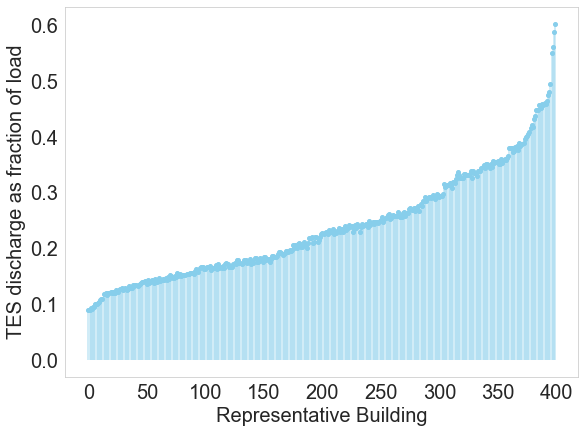

In [22]:
# Total TES discharge to serve load:
tes_discharge = pd.read_excel(ResultsFolder + "TES discharge-"+salt_type+".xlsx")
load = pd.read_excel(ResultsFolder + "load.xlsx")

ordered_tes_discharge = tes_discharge.sort_values(by='building id')
ordered_load = load.sort_values(by='building id')
ordered_tes_discharge = ordered_tes_discharge.reset_index()
ordered_load = ordered_load.reset_index()

# Find TES discharge as fraction of load:
tes_load_combined = pd.DataFrame()
tes_load_combined['building id'] = ordered_load['building id']
tes_load_combined['TES discharge'] = ordered_tes_discharge['TES discharge']
tes_load_combined['load'] = ordered_load['Load']
tes_load_combined['cost saving'] = cost_impacts_TES['cost saving %']
tes_load_combined['TES fraction of load'] = tes_load_combined['TES discharge']/tes_load_combined['load']
ordered_tes_load_combined = tes_load_combined.sort_values(by='cost saving')

# Graph TES as fraction of load
fig, ax = plt.subplots(figsize=(9.2,6.8))
ordered_tes_load_combined = ordered_tes_load_combined.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_tes_load_combined.index, ordered_tes_load_combined['TES fraction of load'])
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("TES discharge as fraction of load", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ordered_tes_load_combined

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

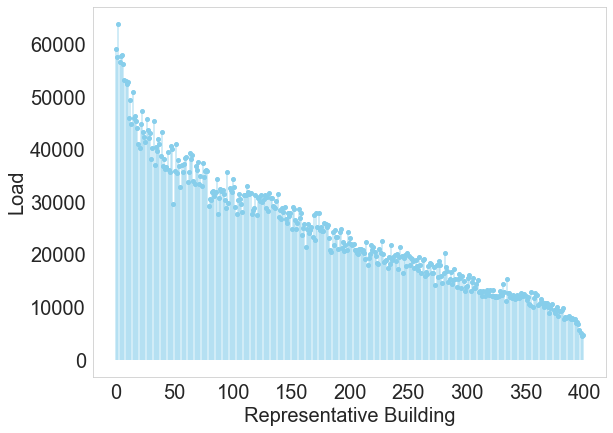

In [42]:
# Graph Load
fig, ax = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_tes_load_combined.index, ordered_tes_load_combined['load'])
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("Load", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [24]:
# HP output:
hp_noTES = pd.read_excel(ResultsFolder + "hp_output - no TES.xlsx")
hp_TES = pd.read_excel(ResultsFolder + "hp_output-"+ salt_type +".xlsx")
hp_noTES = hp_noTES.sort_values(by='building id')
hp_noTES = hp_noTES.reset_index()
hp_TES = hp_TES.sort_values(by='building id')
hp_TES = hp_TES.reset_index()
hp_TES = hp_TES.rename(columns={'HP total': 'HP total - w/TES'})
hp_noTES = hp_noTES.rename(columns={'HP to load': 'HP total - no TES'})
hp_TES['HP total - no TES'] = hp_noTES['HP total - no TES']
hp_TES['cost saving %'] = cost_impacts_TES['cost saving %']
hp_TES['delta HP'] = (hp_TES['HP total - w/TES'] - hp_TES['HP total - no TES'])/hp_TES['HP total - no TES']
hp_TES_sorted = hp_TES.sort_values(by='cost saving %')
hp_TES_sorted = hp_TES_sorted.reset_index()
hp_TES_sorted = hp_TES_sorted.rename(columns={'index': 'building sorted'})
hp_TES_sorted = hp_TES_sorted.reset_index()
hp_TES_sorted

,index,level_0,building sorted,Unnamed: 0,building id,HP to load,HP to TES,HP total - w/TES,HP total - no TES,cost saving %,delta HP
0,0,287,260,0,288,58160.945627,5893.901099,64054.846726,63936.968704,0.018350,0.001844
1,1,399,239,0,400,52698.408422,5327.576147,58025.984568,57919.433045,0.019314,0.001840
2,2,4,42,0,5,53640.663701,5622.170089,59262.833790,59150.390389,0.019446,0.001901
3,3,385,161,0,386,51521.800162,5303.270017,56825.070179,56719.004778,0.019690,0.001870
4,4,0,322,0,1,52489.854700,5638.500283,58128.354983,58015.584978,0.019774,0.001944
...,...,...,...,...,...,...,...,...,...,...,...
395,395,364,382,0,365,3416.251283,3421.391171,6837.642454,6769.214631,0.132518,0.010109
396,396,338,384,0,339,2545.079627,3185.197990,5730.277617,5666.573658,0.151670,0.011242
397,397,210,115,0,211,2245.246490,2943.554835,5188.801325,5129.930228,0.160155,0.011476
398,398,233,317,0,234,1974.584451,2887.752399,4862.336849,4804.581801,0.168357,0.012021


(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

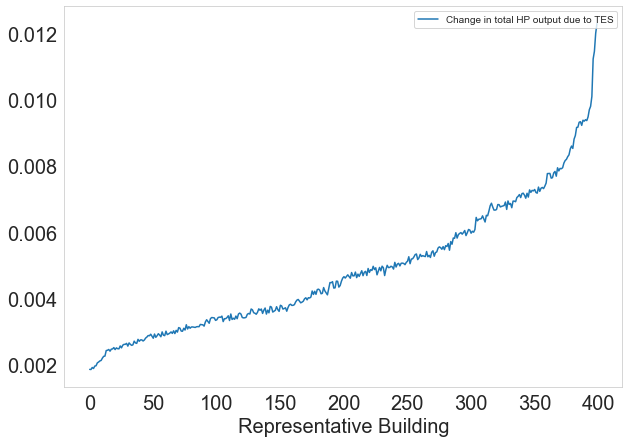

In [25]:
# HP output - no TES:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(hp_TES_sorted['index'], hp_TES_sorted['delta HP'], label = "Change in total HP output due to TES")
#plt.plot(hp_TES_sorted['index'], hp_TES_sorted['HP total - w/TES'], label = "Total HP Output - w/ TES")
plt.legend(loc='upper right')
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)